# Twitter Sentiment Analysis 
- Classifying Tweets using Logistic Regression 

### Importing Libaries & Data

In [22]:
# Importing required libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [23]:
# Loading Tweets Data files (csv)
train_df = pd.read_csv("/Users/Apple/Desktop/NLP/train.csv")
test_df = pd.read_csv("/Users/Apple/Desktop/NLP/test.csv")

### Training Dataset
Data organised in 3 Columns 
   - 1) ID
   - 2) Label (Binary Values: 0 = not a racist/sexist tweet, 1 = is a racist/sexist tweet)
   - 3) Tweet

In [24]:
#Training Dataset
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [25]:
# Training Dataset info
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


### Testing Dataset
Data organised in 2 Columns (does not contain a 'label' column)
   - 1) ID
   - 2) Tweet

In [26]:
#Testing Dataset
test_df.head()
print(test_df.head())

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [27]:
# Testing Dataset info
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


### Combine Dataframes

- For more enhanced analysis, will need to combine both Training & Testing datasets (both unstructured)
- Pre-processing required: remove superflous words, replace & correct misspelled words, replace abbrivated words with full words

In [28]:
# Both the datasets are unstructured therefore need to merge both the datasets
df_combined = train_df.append(test_df, ignore_index = True, sort = False)
df_combined.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [29]:
# Combined datasets info
# ID & Tweet column has 49159 values, Label column has 31962 values
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


# Preprocessing & cleaning data

### 1) HTML entities conversion

In [30]:
# Convert HTML entities into unicode characters (e.g "& amp;" is converted to “&”)
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [31]:
# New 'tweet_cleaned' column created (cleaned version of the tweet)
df_combined['tweet_cleaned'] = df_combined['tweet'].apply(lambda x: html_parser.unescape(x))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...


### 2) Removing "@name"

In [32]:
def tag_remover(tweet_data, pattern):
    """ Function removes all the @name tags using regx """
    r = re.findall(pattern, tweet_data)
    for i in r:
        tweet_data = re.sub(i, '', tweet_data)
    return tweet_data

In [33]:
# Removing '@name' tag
df_combined['tweet_cleaned'] = np.vectorize(tag_remover)(df_combined['tweet_cleaned'], "@[\w]*")
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


### 3) Convert tweets to lowercase

In [34]:
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: x.lower())
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


### 4) Abbreivated words replacement 

In [35]:
# Abbreviated words replacement 
# Can be found from: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
abbreviated_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [36]:
def lookup_dict(input_text, lookup_dictionary):
    """ Function replaces all the abbreviated words """
    for word in input_text.split():
        if word.lower() in lookup_dictionary:
            if word.lower() in input_text.split():
                input_text = input_text.replace(word, lookup_dictionary[word.lower()])
    return input_text

In [37]:
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: lookup_dict(x,abbreviated_dict))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


### 5) Replace acronyms

In [38]:
# Chat acronyms replacement 
acronym_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [39]:
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: lookup_dict(x,acronym_dict))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


### 6) Replace emoticon characters

In [40]:
# Emoticon acronyms replacement 
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [41]:
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: lookup_dict(x,emoticon_dict))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


### 7) Removing punctionations

In [42]:
# Replacing punctionation with a ' '
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ð ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


### 8) Removing any special characters

In [43]:
# Replacing special characters with a ' '
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


### 9) Removing any numbers

In [44]:
# Replacing any numbers with a ' '
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df_combined.head(10)

,id,label,tweet,tweet_cleaned
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


### 10) Removing any words with one character

In [45]:
# Removing any words with one character
df_combined['tweet_cleaned'] = df_combined['tweet_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df_combined['tweet_cleaned'][0:9]

0    when father is dysfunctional and is so selfish...
1    thanks for lyft credit cannot use cause they d...
2                                  bihday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
6                               camping tomorrow danny
7    the next school year is the year for exams can...
8    we won love the land allin cavs champions clev...
Name: tweet_cleaned, dtype: object

### 11) Apply Corrections to Spelling (TextBlob)

In [47]:
# TextBlob used to offer similar matches to spelling errors (also provides probability scores)
from textblob import TextBlob
text = df_combined['tweet_cleaned'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    when father is dysfunctional and is so selfish...
1    thanks for left credit cannot use cause they d...
2                                  midday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
6                               camping tomorrow dandy
7    the next school year is the year for exam cann...
8    we won love the land allen caps champions clev...
9                   welcome here am it has it is so gr
Name: tweet_cleaned, dtype: object

In [52]:
# Tokenizing words via using stopwords from NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenizing tweet_cleaned into a new column
df_combined['tweet_tokenized'] = df_combined['tweet_cleaned'].apply(lambda x: word_tokenize(x))
df_combined.head(10)

[nltk_data] Downloading package stopwords to /Users/Apple/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,label,tweet,tweet_cleaned,tweet_token,tweet_tokenized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[when, father, is, dysfunctional, and, is, so,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, for, lyft, credit, can, not, use, cau..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, you, take, with, you, all, the, ..."
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]"
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, and, big, talking, before, t..."
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]"
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[the, next, school, year, is, the, year, for, ..."
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[we, won, love, the, land, allin, cavs, champi..."
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here am it has it is so gr,"[welcome, here, am, it, has, it, is, so, gr]","[welcome, here, am, it, has, it, is, so, gr]"


In [55]:
# Stopwords imported from NLTK corpus
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Removed stopwords from tweets_tokenized - new columns created 'tweet_tokenized_filtered'
df_combined['tweet_tokenized_filtered'] = df_combined['tweet_tokenized'].apply(lambda x: [word for word in x if not word in stop_words])

# Tokenized_tweets with and without stopwords
df_combined[['tweet_tokenized', 'tweet_tokenized_filtered']].head(10)

[nltk_data] Downloading package stopwords to /Users/Apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet_tokenized,tweet_tokenized_filtered
0,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ..."
1,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"
5,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ..."
6,"[camping, tomorrow, danny]","[camping, tomorrow, danny]"
7,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo..."
8,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland..."
9,"[welcome, here, am, it, has, it, is, so, gr]","[welcome, gr]"


### 12) Stemming and Lemmatization

- #### Apply stemming to filtered tokens
- Removing endings such as "...ing", "...ly" etc
- Suscepitble to errors and mistakes

In [70]:
# Importing stemming functions from NLTK
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# New column with 'tweet_tokenized_filtered' being stemmed
df_combined['stemmed_tweet'] = df_combined['tweet_tokenized_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_combined['stemmed_tweet'].head(10)

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit use caus offer wheelchair va...
2                                       bihday majesti
3                                 model love take time
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6                                  camp tomorrow danni
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                            welcom gr
Name: stemmed_tweet, dtype: object

- #### Apply lemmatization to filtered tokens
- Reducing infinite verbal noun to root word (i.e "writing" into "write")

In [71]:
# Importing lemmatization functions from NLTK
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

# New columns with 'tweet_tokenized_filtered' being lemmatized
df_combined['lemmatized_tweet'] = df_combined['tweet_tokenized_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df_combined['lemmatized_tweet'].head(10)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6                               camping tomorrow danny
7    next school year year exam think school exam h...
8    love land allin cavs champion cleveland clevel...
9                                           welcome gr
Name: lemmatized_tweet, dtype: object

In [72]:
# Final pre-processed dataframe
df_combined.head(10)

,id,label,tweet,tweet_cleaned,tweet_token,tweet_tokenized,tweet_tokenized_filtered,tweet_stemmed,tweet_lemmatized,stemmed_tweet,lemmatized_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...,father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...,thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty,bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, you, take, with, you, all, the, ...","[model, love, take, time]",model love take time,model love take time,model love take time,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation,factsguid societi motiv,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...,huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]","[camping, tomorrow, danny]",camp tomorrow danni,camping tomorrow danny,camp tomorrow danni,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams can...,"[the, next, school, year, is, the, year, for, ...","[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo...",next school year year exam think school exam h...,next school year year exam think school exam h...,next school year year exam think school exam h...,next school year year exam think school exam h...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...,"[we, won, love, the, land, allin, cavs, champi...","[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...,love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here am it has it is so gr,"[welcome, here, am, it, has, it, is, so, gr]","[welcome, here, am, it, has, it, is, so, gr]","[welcome, gr]",welcom gr,welcome gr,welcom gr,welcome gr


# Text Analysis
- "stemmed_tweet" & "lematized_tweet" columns will be used for analysis

### Word cloud for "stemmed_tweet" - most frequent words 
- includes racists/sexists tweets

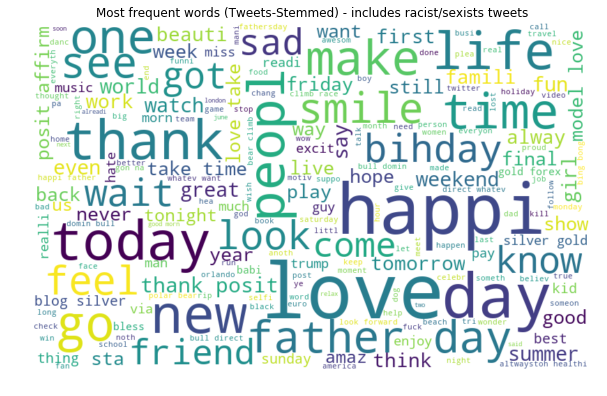

In [91]:
all_words = ' '.join([text for text in df_combined['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent words (Tweets-Stemmed) - includes racist/sexists tweets")
plt.show()

### Word cloud for "lemmatized_tweet" - most frequent words
- includes racists/sexists tweets

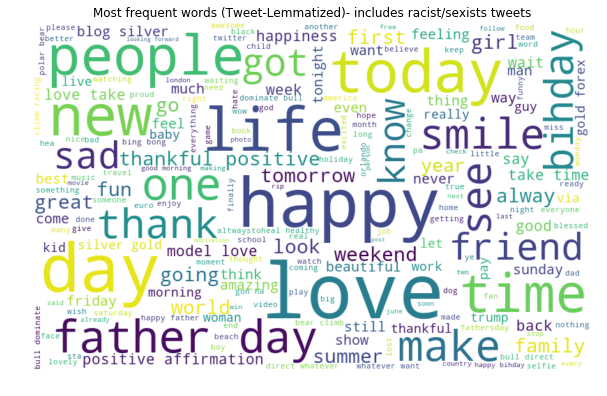

In [92]:
all_words = ' '.join([text for text in df_combined['lemmatized_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent words (Tweet-Lemmatized)- includes racist/sexists tweets")
plt.show()

### Word cloud for "stemmed_tweet" - most frequent words
- does not include racists/sexists tweets

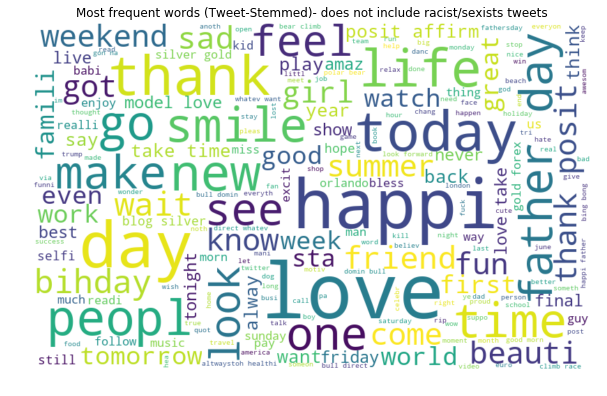

In [98]:
non_racists_words =' '.join([text for text in df_combined['tweet_stemmed'][df_combined['label'] == 0]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(non_racists_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent words (Tweet-Stemmed)- does not include racist/sexists tweets")
plt.show()

### Word cloud for "lemmatized_tweet" - most frequent words
- does not include racists/sexists tweets

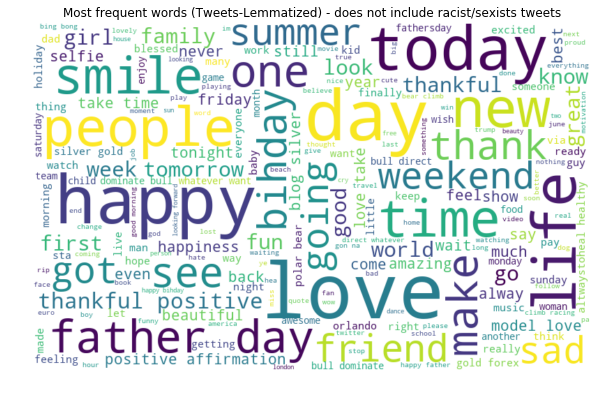

In [97]:
non_racists_words =' '.join([text for text in df_combined['lemmatized_tweet'][df_combined['label'] == 0]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(non_racists_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent words (Tweets-Lemmatized) - does not include racist/sexists tweets")
plt.show()

-  Most frequent words "happy" and "love"; majority of words are are positive/neutral

###  Most frequent racist/sexist tweets (Tweet-Stemmed) - Word Cloud

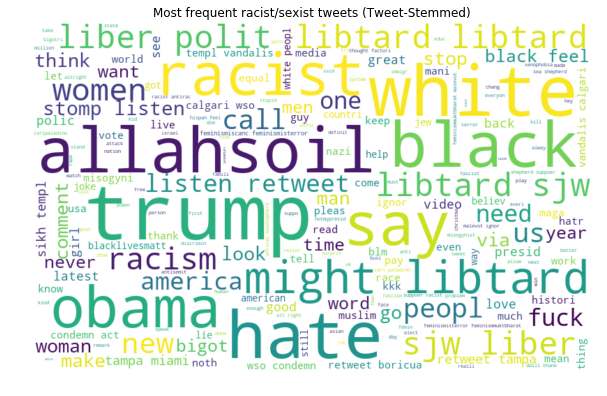

In [101]:
racist_words =' '.join([text for text in df_combined['tweet_stemmed'][df_combined['label'] == 1]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(racist_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent racist/sexist tweets (Tweet-Stemmed)")
plt.show()

###  Most frequent racist/sexist tweets (Tweet-Lemmatized) - Word Cloud

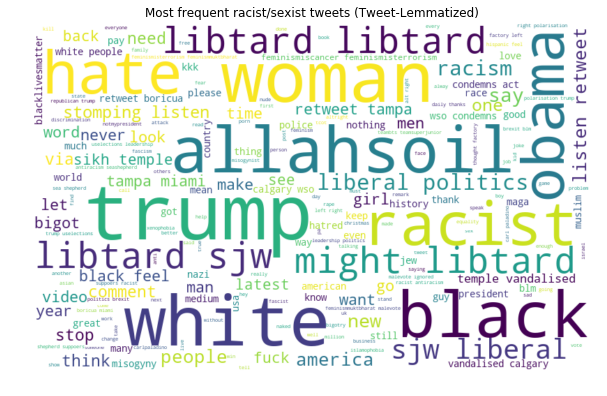

In [103]:
racist_words =' '.join([text for text in df_combined['lemmatized_tweet'][df_combined['label'] == 1]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(racist_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most frequent racist/sexist tweets (Tweet-Lemmatized)")
plt.show()

- Most frequent racist/sexist words are "Racist" and "Hate"

# Feature Extractions

### Bag-of-Words Features

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bag_of_words_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [116]:
# Bag-of-words feature matrix (Tweet-Stemmed)
bag_of_words_stem = bow_vectorizer.fit_transform(df_combined['tweet_stemmed'])
bag_of_words_stem

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 203383 stored elements in Compressed Sparse Row format>

In [117]:
# Bag-of-words feature matrix (Tweet-Lemmatized)
bag_of_words_lemm = bow_vectorizer.fit_transform(df_combined['lemmatized_tweet'])
bag_of_words_lemm

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 187340 stored elements in Compressed Sparse Row format>

### TF-IDF Features

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tf_idf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [123]:
# TF-IDF feature matrix (Tweet-Stemmed)
tf_idf_stem = tfidf_vectorizer.fit_transform(df_combined['tweet_stemmed'])
tf_idf_stem

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 203383 stored elements in Compressed Sparse Row format>

In [124]:
# TF-IDF feature matrix (Tweet-Lemmatized)
tf_idf_lemm = tfidf_vectorizer.fit_transform(df_combined['lemmatized_tweet'])
tf_idf_lemm

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 187340 stored elements in Compressed Sparse Row format>

# Logistic Regression Model 

In [126]:
# Builing Logistic Regression Models for both Bag-of-Words and TF-IDF
# Importing Scikit-learn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### Logistic Regression model - Bag-of-Words features (Tweet-Stemmed)

In [137]:
train_bag_of_words = bag_of_words_stem[:31962,:]
test_bag_of_words = bag_of_words_stem[31962:,:]

# split into training and validation sets
xtrain_bag_of_words, xvalid_bag_of_words, ytrain, yvalid = train_test_split(train_bag_of_words, train_df['label'], random_state=42, test_size=0.3)

# training the logistics regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain_bag_of_words, ytrain)

# predicting on the validation set
# if prediction is >= to 0.3 than prediction = 1, else 0
prediction = logistic_regression.predict_proba(xvalid_bag_of_words) 
prediction_integer = prediction[:,1] >= 0.3 
prediction_integer = prediction_integer.astype(np.int)

# Bag-of-words (Tweet-Stemmed) - f1 score
f1_score_bag_of_words_stem = f1_score(yvalid, prediction_integer) 
print(f1_score_bag_of_words_stem)

0.5550952775476387


### Logistic Regression model - Bag-of-Words features (Tweet-Lemmatized)

In [138]:
train_bag_of_words = bag_of_words_lemm[:31962,:]
test_bag_of_words = bag_of_words_lemm[31962:,:]

# split into training and validation sets
xtrain_bag_of_words, xvalid_bag_of_words, ytrain, yvalid = train_test_split(train_bag_of_words, train_df['label'], random_state=42, test_size=0.3)

# training the logistics regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain_bag_of_words, ytrain) # training the model

# predicting on the validation set
# if prediction is >= to 0.3 than prediction = 1, else 0
prediction = logistic_regression.predict_proba(xvalid_bag_of_words)
prediction_integer = prediction[:,1] >= 0.3
prediction_integer = prediction_integer.astype(np.int)

# Bag-of-words (Tweet-Lemmatized) - f1 score
f1_score_bag_of_words_lemm = f1_score(yvalid, prediction_integer) # calculating f1 score
print(f1_score_bag_of_words_lemm)

0.5372112917023096


### Logistic Regression model - TF-IDF features (Tweet-Stemmed)

In [132]:
train_tfidf = tf_idf_stem[:31962,:]
test_tfidf = tf_idf_stem[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

# training the logistics regression model
logistic_regression.fit(xtrain_tfidf, ytrain)

# predicting on the validation set
# if prediction is >= to 0.3 than prediction = 1, else 0
prediction = logistic_regression.predict_proba(xvalid_tfidf)
prediction_integer = prediction[:,1] >= 0.3
prediction_integer = prediction_integer.astype(np.int)

# TF-IDF (Tweet-Stemmed) - f1 score
f1_score_tf_idf_stemm = f1_score(yvalid, prediction_integer)
print(f1_score_tf_idf_stemm)

0.5444933920704845


### Logistic Regression model - TF-IDF features (Tweet-Lemmatized)

In [133]:
train_tfidf = tf_idf_lemm[:31962,:]
test_tfidf = tf_idf_lemm[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

# training the logistics regression model
logistic_regression.fit(xtrain_tfidf, ytrain)

# predicting on the validation set
# if prediction is >= to 0.3 than prediction = 1, else 0
prediction = logistic_regression.predict_proba(xvalid_tfidf)
prediction_integer = prediction[:,1] >= 0.3
prediction_integer = prediction_integer.astype(np.int)

# TF-IDF (Tweet-Lemmatized) - f1 score
f1_score_tf_idf_lemm = f1_score(yvalid, prediction_integer)
print(f1_score_tf_idf_lemm)

0.5391459074733096


In [142]:
print("Bag-of-Words features")
print("   F1-Score: ",f1_score_bag_of_words_stem,"(Stemmed)")
print("   F1-Score: ",f1_score_bag_of_words_lemm,"(Lemmatized)")
print("TF-IDF features")
print("   F1-Score: ",f1_score_tf_idf_stemm,"(Stemmed)")
print("   F1-Score: ",f1_score_tf_idf_lemm,"(Lemmatized)")

Bag-of-Words features
   F1-Score:  0.5550952775476387 (Stemmed)
   F1-Score:  0.5372112917023096 (Lemmatized)
TF-IDF features
   F1-Score:  0.5444933920704845 (Stemmed)
   F1-Score:  0.5391459074733096 (Lemmatized)
